# User Story 3
- User utilizes the CurrentExp class to initialize a whole experiment as an object
- User fills out the Blueprint with the PARAMETERS and deliver it to the class.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef.
- Lastly, the run_single_pipeline() function is executed to run the a whole experiment as a one liner

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors, percentage_to_instance_converter
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment


[2025-06-12 12:45:19] INFO - Custom-named logger active.
[2025-06-12 12:45:19] INFO - Custom-named logger active.


In [3]:
# Example usage
import copy
configuration = load_and_expand_yaml("experiment.yaml")
configuration = [copy.deepcopy(cfg) for cfg in configuration]  # Important if Configs are mutated!
configuration_2 = load_and_expand_yaml("experiment_2.yaml")

# load an explicit config and initialize the experiment
experiment = Experiment(config=configuration[11], base_path="112UCRFolds", results_root="simulation_results")

[2025-06-12 12:45:20] INFO - Loading and expanding YAML configuration from: experiment.yaml
[2025-06-12 12:45:20] INFO - YAML configuration expanded into 18 configurations
[2025-06-12 12:45:20] INFO - Loading and expanding YAML configuration from: experiment_2.yaml
[2025-06-12 12:45:20] INFO - YAML configuration expanded into 30 configurations
[2025-06-12 12:45:21] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-12 12:45:21] INFO - Initializing Exp with dataset: Beef, classifier: Weasel-D, strategy: LabelErrors
[2025-06-12 12:45:21] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 1, 'start': 0, 'stop': 90, 'step': 2}


X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)


[2025-06-12 12:45:22] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0


X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
[2025-06-12 12:45:24] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-06-12 12:45:24] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}


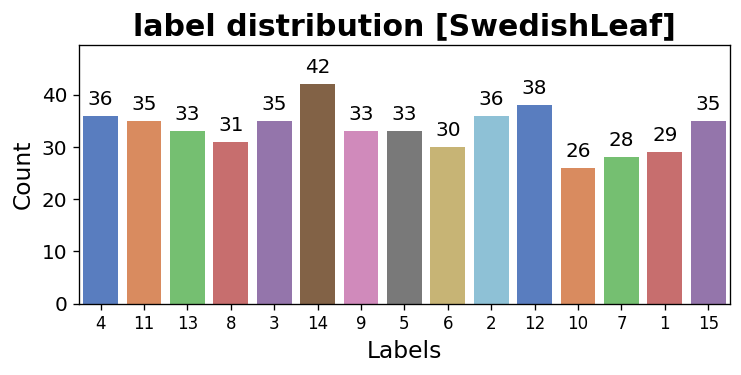

In [4]:
experiment_ = Experiment(config = configuration_2[0], base_path="112UCRFolds", results_root="simulation_results")
experiment_.dataset_overview()

In [5]:
experimental_dict = {}
my_config = configuration_2[0:6]

for i_, exp_conf in enumerate(my_config):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-06-12 12:45:25] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-12 12:45:25] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-06-12 12:45:25] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 12:45:25] INFO - Run Experiment
[2025-06-12 12:45:25] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 12:45:25] INFO - requested_instance_step = 25.0 will be transformed into 25
[2025-06-12 12:45:25] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-06-12 12:45:25] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '2' '3' '4' '5' '6' '7' '8' '9']
[2025-06-12 12:45:25] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 12:45:25] INFO - The p_vector for the current_experiment: [0.0667, 0.0667, 0.0667, 0.0667, 0.

X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)
X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)
X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)
X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (62

[2025-06-12 12:45:25] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-12 12:45:25] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: Weasel-D, strategy: LabelErrors
[2025-06-12 12:45:25] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 1, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 12:45:25] INFO - Run Experiment
[2025-06-12 12:45:25] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 12:45:25] INFO - requested_instance_step = 25.0 will be transformed into 25
[2025-06-12 12:45:25] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-06-12 12:45:25] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '2' '3' '4' '5' '6' '7' '8' '9']
[2025-06-12 12:45:25] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 12:45:25] INFO - The p_vector for the current_experiment: [0.0667, 0.0667, 0.0667, 0.0667, 0.

X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)


In [6]:
experimental_dict.keys()

dict_keys(['experiment_0', 'experiment_1', 'experiment_2', 'experiment_3', 'experiment_4', 'experiment_5'])

In [7]:
experimental_dict["experiment_1"][0]

{'DATASET_NAME': 'SwedishLeaf',
 'CLASSIFIER_NAME': 'Quant',
 'REDUCTION_F': 1,
 'RANDOM_S': 0,
 'DCA': {'type': 'LabelErrors',
  'DoE_param': {'le_strategy': 'leV1',
   'p_vec': 'None',
   'random_seed': 0,
   'start': 0,
   'stop': 90,
   'step': 5}}}

In [8]:
experimental_dict["experiment_1"][1].df_.iloc[15:20]

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
15,15,375,0.75,0.4672,"[2, 12, 3, 4, 5, 12, 9, 14, 8, 1, 8, 7, 12, 6,...","[2, 11, 12, 4, 14, 1, 12, 13, 13, 8, 13, 11, 1...","[[0.11, 0.005, 0.03, 0.085, 0.14, 0.02, 0.095,..."
16,16,400,0.80,0.3696,"[2, 12, 3, 3, 5, 12, 9, 14, 8, 1, 8, 7, 12, 6,...","[1, 11, 12, 4, 14, 8, 12, 13, 13, 8, 13, 9, 14...","[[0.165, 0.005, 0.03, 0.085, 0.095, 0.025, 0.1..."
17,17,425,0.85,0.2864,"[2, 12, 3, 3, 5, 12, 9, 14, 8, 1, 8, 7, 12, 6,...","[2, 13, 12, 4, 14, 5, 11, 13, 13, 8, 9, 4, 14,...","[[0.145, 0.02, 0.045, 0.04, 0.105, 0.01, 0.1, ..."
18,18,450,0.90,0.1856,"[2, 12, 3, 3, 5, 12, 9, 14, 2, 1, 8, 7, 12, 6,...","[2, 13, 12, 4, 14, 8, 12, 12, 13, 8, 13, 11, 5...","[[0.125, 0.005, 0.03, 0.03, 0.105, 0.055, 0.11..."


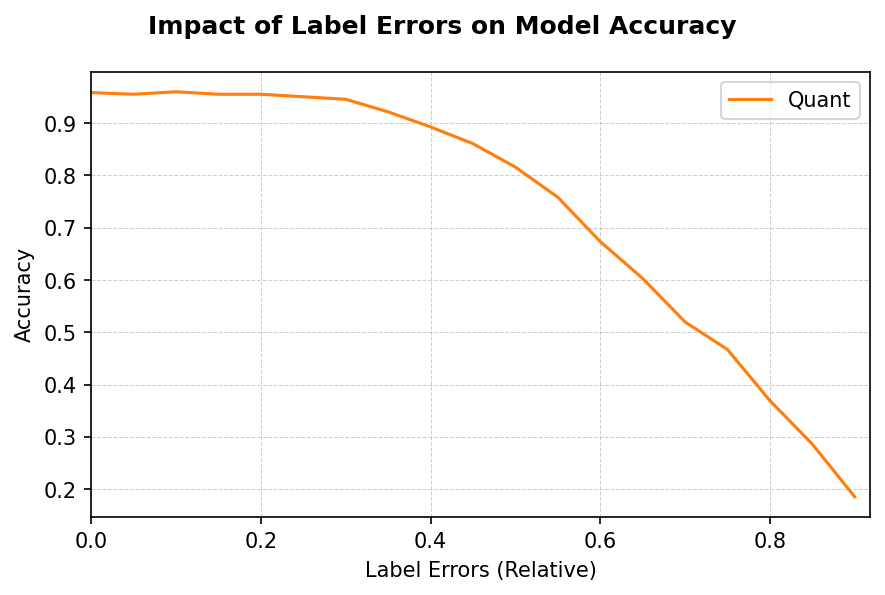

In [9]:
experimental_dict["experiment_1"][1].acc_decr()
#or use the function directly
#visualize_acc_decr(experimental_dict["experiment_1"][1].df_, first="relative", cl_="MR-Hydra")

In [10]:
dfs_, clfs_, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)

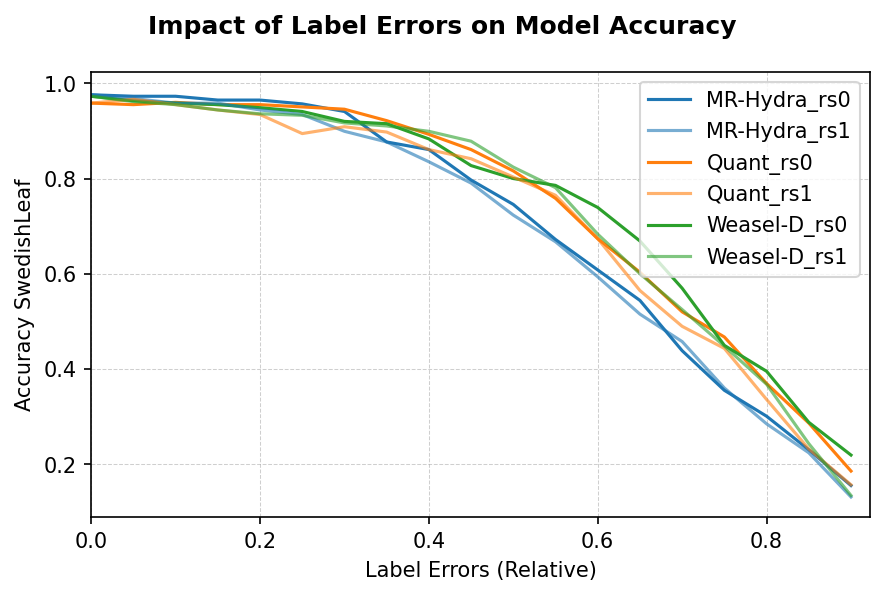

In [11]:
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=clfs_seed_, ds_="SwedishLeaf", filename_="acc_decr", save_fig=True, exp_folder=None)

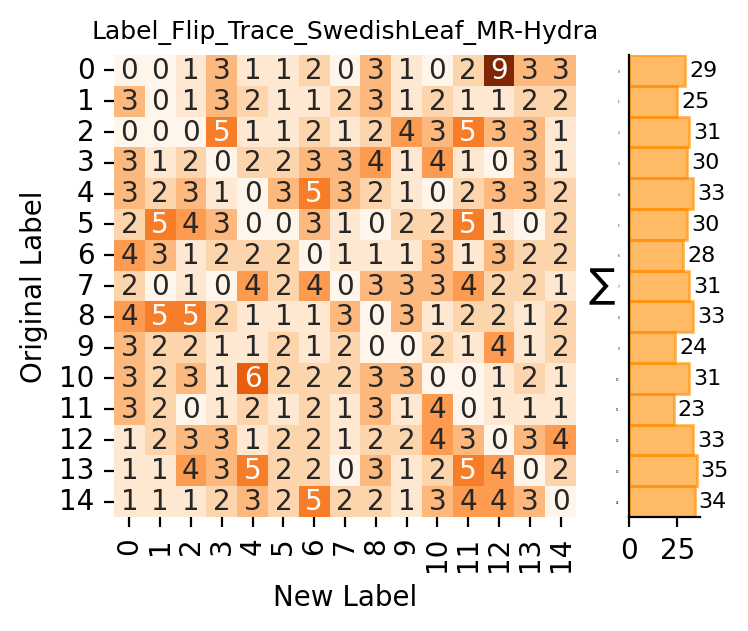

In [ ]:
experimental_dict["experiment_0"][1].trace_M()

In [ ]:
from pipeline_builder import run_single_pipeline
DATASET_NAME = "Beef"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                            #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"random_seed":0,"start":0,"stop":26,"step":1}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True 
DATA_VIS  = False

experiment_args = [DATASET_NAME, CLASSIFIER_NAME, REDUCTION_F,RANDOM_S, DCA, DoE_PARAM, EXP_FOLD, SAVE_FILES]

results = run_single_pipeline(*experiment_args)

X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)
searching for ['Beef_res_0_0_26_1.csv'] in simulation_results/MR-Hydra/Beef
Potential Files in the current directory:  ['.DS_Store', 'Beef_res_0_0_26_1.csv', 'Beef_res_0_0_23_1.csv', 'Beef_res_0_0_18_1.csv', 'Beef_res_TEST.csv', 'Beef_res_0_0_16_2.csv', 'Beef_res_0_0_6_2.csv']
✅ Exact match found: Beef_res_0_0_26_1.csv
